# Problem 2

## Part 2

In [1]:
import numpy as np
from scipy.sparse import csgraph
from scipy.sparse.linalg import eigsh
from sklearn.neighbors import kneighbors_graph


def laplacian_eigenmap_reduction(X: np.ndarray, d: int, n_neighbors: int) -> np.ndarray:
    """Dimensionality reduction using Laplacian Eigenmap.

    Args:
        X (np.ndarray): High-dimensional data, shape (N, D).
        d (int): Target dimensionality (d << D).
        n_neighbors (int, optional): Number of neighbors for k-NN graph.

    Returns:
        np.ndarray: Reduced data, shape (N, d).
    """
    # constructing weighted graph using k-NN
    W = kneighbors_graph(X, n_neighbors, mode='distance', include_self=False)
    W = 0.5 * (W + W.T)  # ensure the matrix is symmetric

    # # computing the Laplacian matrix
    L = csgraph.laplacian(W, normed=False)

    # eigenvalue decomposition, selecting the first d non-zero eigenvectors
    _, eigenvectors = eigsh(L, k=d + 1, which='SM')

    # skipping the first eigenvector corresponding to 0 and using the next d eigenvectors
    return eigenvectors[:, 1:d + 1]

# Problem 3

## Part 2

In [2]:
import networkx as nx
from networkx.algorithms import community as nx_community

In [3]:
# load the edgelist and create an undirected graph
file_path = '/Users/ljoana/Downloads/email-Eu-core.txt'
G = nx.read_edgelist(file_path, create_using=nx.Graph())

In [4]:
G.is_directed()

False

In [5]:
# load the edgelist and create an undirected graph
file_path = '/Users/ljoana/Downloads/email-Eu-core.txt'
G = nx.read_edgelist(file_path, create_using=nx.Graph())

# load the true labels and convert them to a list of sets of nodes
true_labels_path = '/Users/ljoana/Downloads/email-Eu-core-department-labels.txt'
true_labels = {}
with open(true_labels_path, 'r') as file:
    for line in file:
        node, label = line.strip().split()
        true_labels[node] = label

true_communities = {}
for node, comm_id in true_labels.items():
    true_communities.setdefault(comm_id, set()).add(node)
true_communities = list(true_communities.values())

In [6]:
# compute modularity for true communities
true_modularity = nx_community.modularity(G, true_communities)
print("Modularity of true communities:", true_modularity)

Modularity of true communities: 0.3137611028706121


### Label propagation approach

In [7]:
# apply label propagation to detect communities
communities_label_propagation = nx_community.label_propagation_communities(G)
label_propagation_communities = [set(c) for c in communities_label_propagation]

# calculate modularity for detected communities
detected_modularity = nx_community.modularity(G, label_propagation_communities)
print("Modularity of detected communities:", detected_modularity)

Modularity of detected communities: 0.08900284744977784


### Girvan-Newman approach

In [8]:
# apply the Girvan-Newman algorithm
communities_generator = nx_community.girvan_newman(G)

max_iterations = 30
iteration = 0
modularities = []
for communities in communities_generator:
    iteration += 1
    current_communities = [set(c) for c in communities]
    current_modularity = nx_community.modularity(G, current_communities)
    modularities.append(current_modularity)
    print(f"Iteration {iteration}: Modularity = {current_modularity}, Number of communities = {len(current_communities)}")

    # stop after processing the set max_iterations
    if iteration >= max_iterations:
        break

Iteration 1: Modularity = 0.0031089277455570302, Number of communities = 21
Iteration 2: Modularity = 0.003108818461984198, Number of communities = 22
Iteration 3: Modularity = 0.0031087073868773336, Number of communities = 23
Iteration 4: Modularity = 0.003108594520236437, Number of communities = 24
Iteration 5: Modularity = 0.003108479862061619, Number of communities = 25
Iteration 6: Modularity = 0.00310836341235288, Number of communities = 26
Iteration 7: Modularity = 0.0031082451711101087, Number of communities = 27
Iteration 8: Modularity = 0.003108125138333305, Number of communities = 28
Iteration 9: Modularity = 0.0031080033140225803, Number of communities = 29
Iteration 10: Modularity = 0.0032273391840628974, Number of communities = 30
Iteration 11: Modularity = 0.0032272101936162657, Number of communities = 31
Iteration 12: Modularity = 0.003227079411635602, Number of communities = 32
Iteration 13: Modularity = 0.0032269468381209056, Number of communities = 33
Iteration 14: M

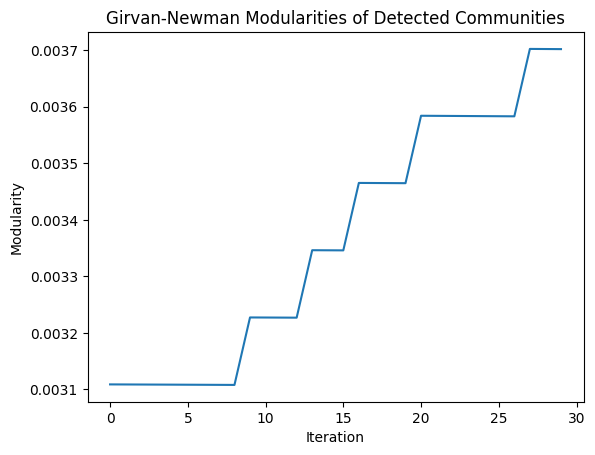

In [14]:
import matplotlib.pyplot as plt


x = [it for it in range(len(modularities))]
plt.plot(x, modularities)
plt.title("Girvan-Newman Modularities of Detected Communities")
plt.xlabel("Iteration")
plt.ylabel("Modularity")
plt.show()